## Data 620 - Project 2

### Team No. 6

- Yohannes Deboch
- Sherranette Tinapunan

### Video Presentation

https://screencast-o-matic.com/watch/cqeq070EP6


### Project 2

- Identify a large 2-node network dataset—you can start with a dataset in a repository.  
- Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
- Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
- What can you infer about each of the distinct groups?

### Data Set

- Nashville Meetup Network 
- https://www.kaggle.com/stkbailey/nashville-meetup#member-to-group-edges.csv
- This data describes member to group relationship



----

In [1]:
import pandas as pd
import networkx as nx
import math
import matplotlib.pyplot as plt
import networkx.algorithms.bipartite as bipartite

### Load Data

In [2]:
# load the data
df = pd.read_csv("member-to-group-edges.csv")
#df = df.loc[df['member_id'].isin(['97910802', '625050', '2069', '9710170', '127144472'])]

### Preview of Membership-Group Data

The data is an edge list. The weight is the number of events a member attended in that group. <br/>
Unfortunately, we do not have data on the names of the Meetup groups. 

In [3]:
df.head(10)

,member_id,group_id,weight
0,2069,19277993,3
1,625050,19277993,2
2,1939496,19277993,1
3,2606806,19277993,4
4,3438546,19277993,1
5,4211111,19277993,1
6,4353024,19277993,5
7,5175848,19277993,1
8,5300858,19277993,1
9,5636006,19277993,1


### Create Bipartite Graph Object

In [4]:
#create graph object from data frame of edge list.
G = nx.from_pandas_edgelist(df=df, source='member_id', target='group_id', edge_attr=['weight'])

### Set the Bipartite Nodes into Member and Group Nodes

The steps below identifies which nodes are member nodes and which nodes are group nodes. 

In [5]:
#members
members = df.iloc[:, 0].unique().tolist()

#groups
groups = df.iloc[:,1].unique().tolist()

#add the node type in bipartite
G.add_nodes_from(members, bipartite=0)
G.add_nodes_from(groups, bipartite=1)

### Bipartite Graph Info

In [6]:
print(nx.info(G))

Graph with 25233 nodes and 45583 edges


### Get Member and Group Nodes

'mem' and 'grp' are set objects that contain the labels of member and group nodes.

In [7]:
mem, grp = bipartite.sets(G, set(members))

### Project Bipartite Network on Group Nodes

For this analysis, we are interested in viewing the bipartite network projected as group nodes. We want to investigate which nodes are strongly associated with each other. In this case, two groups are strongly associated with each other when they share many common members. These are probably groups that share like minded members/ similar interests. 

In [8]:
#Project bipartite graph on members
group_association = bipartite.weighted_projected_graph(G, grp)

### Group Graph Info

This is a graph of the bipartite network projected on the group nodes. 

In [9]:
print(nx.info(group_association))

Graph with 602 nodes and 21390 edges


### Graph of Group Network

This gives us an idea of the general shape of the group network. As you can see, some groups are not connected well while the rest of the groups are gathered together towards the middle of the graph. 

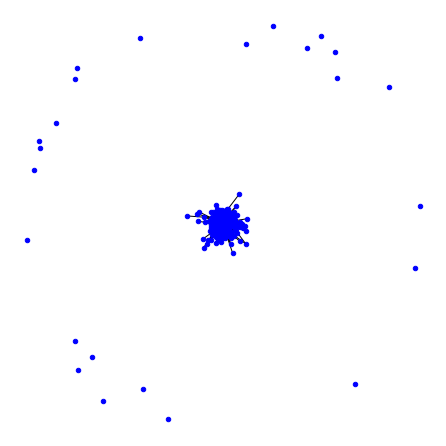

In [10]:
#Get an idea of the shape of the network
plt.figure(3,figsize=(6,6)) 
nx.draw(group_association, node_size=20, node_color='blue')

### Strongest Group Associations

The edge weight between two groups represents the number of shared neighbors. In this case, the number of shared neighbors is the number of members that are common between the two groups. 

In [11]:
pd.DataFrame.from_dict(nx.get_edge_attributes(group_association, 'weight'), orient='index', columns=['Weight']) \
.sort_values(by=['Weight'], ascending=False).head(10)

,Weight
"(16487812, 10016242)",211
"(11625832, 10016242)",159
"(18243826, 19728145)",156
"(10016242, 16477792)",152
"(18850080, 10016242)",148
"(7836842, 10016242)",146
"(7130232, 10016242)",142
"(1585196, 339011)",137
"(10016242, 10178242)",136
"(18494105, 10016242)",118


### Calculate Centrality Metrics

In [12]:
degree = pd.DataFrame.from_dict(dict(nx.degree(group_association)), orient='index', columns=['Degree'])
degree_centrality = pd.DataFrame.from_dict(nx.degree_centrality(group_association), orient='index', columns=['Degree_Centrality'])
eigenvector_centrality = pd.DataFrame.from_dict(nx.eigenvector_centrality(group_association), orient='index', columns=['Eigenvector_Centrality'])
closeness_centrality = pd.DataFrame.from_dict(nx.closeness_centrality(group_association), orient='index', columns=['Closeness Centrality'])
betweenness_centrality = pd.DataFrame.from_dict(nx.betweenness_centrality(group_association), orient='index', columns=['Betweenness Centrality'])

In [13]:
dfs = [degree,degree_centrality,eigenvector_centrality,closeness_centrality,betweenness_centrality]

In [15]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
#metrics = pd.concat([degree, degree_centrality], axis=1, join_axes=[degree.index])
metrics = pd.concat([degree, degree_centrality], axis=1)
metrics = metrics.reindex(degree.index)
#metrics = pd.concat([metrics, eigenvector_centrality], axis=1, join_axes=[metrics.index])
metrics = pd.concat([metrics, eigenvector_centrality], axis=1)
metrics = metrics.reindex(metrics.index)
#metrics = pd.concat([metrics, closeness_centrality], axis=1, join_axes=[metrics.index])
metrics = pd.concat([metrics, closeness_centrality], axis=1)
metrics = metrics.reindex(metrics.index)
#metrics = pd.concat([metrics, betweenness_centrality], axis=1, join_axes=[metrics.index])
metrics = pd.concat([metrics, betweenness_centrality], axis=1)
metrics = metrics.reindex(metrics.index)

In [16]:
metrics.sort_values(by=['Degree_Centrality', 'Eigenvector_Centrality'], ascending=False).head(10)

,Degree,Degree_Centrality,Eigenvector_Centrality,Closeness Centrality,Betweenness Centrality
19728145,348,0.579035,0.114700,0.681376,0.030016
18955830,341,0.567388,0.113628,0.676384,0.025020
339011,331,0.550749,0.113019,0.666617,0.025921
1187715,315,0.524126,0.110442,0.653253,0.015916
4126912,290,0.482529,0.107706,0.633820,0.016173
1585196,289,0.480865,0.103445,0.633095,0.018429
18506072,288,0.479201,0.106751,0.636003,0.017836
18243826,288,0.479201,0.095687,0.631652,0.019242
18562307,282,0.469218,0.104133,0.627359,0.015510
19713173,275,0.457571,0.100454,0.623827,0.015200


### Ego Network of Group 19728145

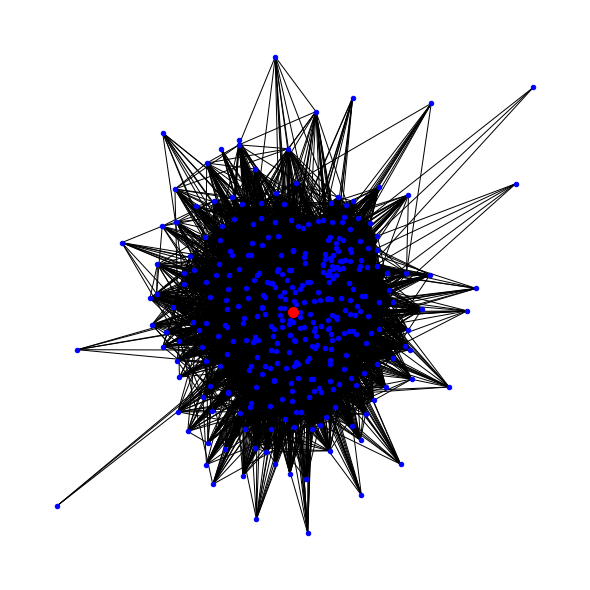

In [17]:
# Set size
plt.figure(3,figsize=(8,8)) 

# Create ego graph of node 19728145
ego = nx.ego_graph(group_association, 19728145)

# Draw graph
pos = nx.spring_layout(ego)
nx.draw(ego, pos, node_color='b', node_size=20, with_labels=False)

# Draw ego as large and red
nx.draw_networkx_nodes(ego, pos, nodelist=[19728145], node_size=100, node_color='r')
plt.show()

In [18]:
len(ego)

349

### Define Functions for Island Method

These are the functions that support in analyzing the network using the Island Method. <br/>
This is take from the book "Social Analysis for Netowrk Startups" on page 64. 

In [19]:
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,weight=edata['weight'])
    return g2

def island_method(g, iterations=5):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [20]:
#threshold: number of shared members, network that meets threshold
islands=island_method(group_association)

### Result of Island Method Analysis

- For groups that share 1 member, there are 472 nodes, and the network separates into 2 island subgraphs. 
- For groups that share 43 members, there are 63 nodes, and the network separates into 3 island subgraphs.
- For groups that share 85 members, there are 23 nodes, and the network separates into 4 island subgraphs. 
- For groups that share 127 members, there are 12 nodes, and the network separates into 3 island subgraphs.
- For groups that share 169 members, there are 2 nodes, and the network separates into 1 island subgraphs. 

In [22]:
for i in islands:
     print (i[0],len(i[1]),len(list(i[1].subgraph(c) for c in nx.connected_components(i[1]))))



1 472 2
43 63 5
85 23 4
127 12 3
169 2 1


### Groups to Invite

We want to invite groups that share at least 100 members with each other to this special event that would discuss topics that we feel would be interesting to the members of these particular groups.

There are 17 nodes that share at least 100 members, and this network separates into 3 island subgraphs. 

In [23]:
invite_groups = trim_edges(group_association, 100)

In [25]:
# number of nodes, number of islands
((len(invite_groups), len(list(invite_groups.subgraph(c) for c in nx.connected_components(invite_groups))[0])))

(17, 2)

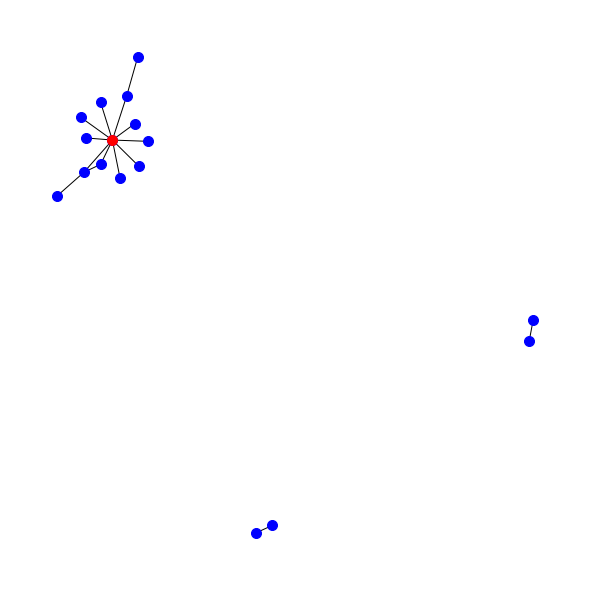

In [28]:
plt.figure(3,figsize=(8,8)) 
pos = nx.spring_layout(invite_groups)
nx.draw(invite_groups, pos, node_color='blue', node_size=100, with_labels=False)
nx.draw_networkx_nodes(invite_groups, pos, nodelist=[10016242], node_size=100, node_color='r')
plt.show()

In [27]:
pd.DataFrame.from_dict(nx.get_edge_attributes(invite_groups, 'weight'),  orient='index', columns=['Weight']).sort_values(by=['Weight'], ascending=False)




,Weight
"(10016242, 16487812)",211
"(10016242, 11625832)",159
"(18243826, 19728145)",156
"(10016242, 16477792)",152
"(18850080, 10016242)",148
"(10016242, 7836842)",146
"(10016242, 7130232)",142
"(1585196, 339011)",137
"(10016242, 10178242)",136
"(10016242, 18494105)",118


### Insights

- There are 602 Meetup groups. 
- There are 17 groups that share at least 100 members with another group.
- This smaller network of 17 groups separates into 3 subgraph islands. 
- These 3 subgraph islands may represent 3 different types of interests that are not similar. 
- Event organizers may want to create a special event specifically targetting group members that are part of the largest island. 

----
